In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

## Exploratory Analysis

In [2]:
# import csv file

df = pd.read_csv('coaster_db.csv')

In [3]:
# show number of rows and columns

df.shape

(1087, 56)

In [4]:
# display first 5 rows

df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
# display all column names and data type of each column

df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [6]:
# display description of the numerical data 

df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Data Preparation

In [7]:
# drop all columns other than those we want to keep

df = df.loc[:, ['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced', 'latitude', 'longitude', 
                    'Type_Main', 'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce_clean' ] ].copy()

In [8]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [9]:
# convert 'opening_date_clean' from object to date 

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [10]:
# Rename the columns

df = df.rename(columns={'coaster_name':'CoasterName','year_introduced':'YearIntroduced','latitude':'Latitude','longitude':'Longitude',
                   'Type_Main':'Type','opening_date_clean':'OpeningDate','speed_mph':'SpeedMPH','height_ft':'HeightFT',
                   'Inversions_clean':'Inversions','Gforce_clean':'Gforce'})

In [11]:
# identify the number of null values for each column

df.isna().sum()

CoasterName         0
Location            0
Status            213
Manufacturer       59
YearIntroduced      0
Latitude          275
Longitude         275
Type                0
OpeningDate       250
SpeedMPH          150
HeightFT          916
Inversions          0
Gforce            725
dtype: int64

In [12]:
# identify the number of rows where the coaster names are duplicated

df.duplicated(subset='CoasterName').sum()

97

In [13]:
# Remove all rows from the dataset where 'CoasterName', 'Location', and 'OpeningDate' are duplicated

df = df.loc[~df.duplicated(subset=['CoasterName', 'Location', 'OpeningDate'])].reset_index(drop=True).copy()

In [14]:
df.shape

(990, 13)

## Feature Exploration

In [15]:
# identify the number of roller coasters introduced by year

df['YearIntroduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: YearIntroduced, Length: 101, dtype: int64

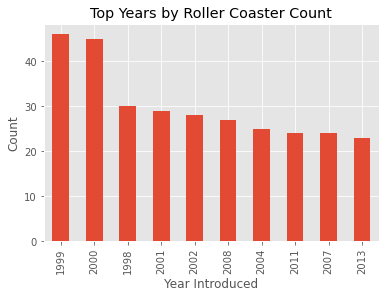

In [16]:
# plot the top 10 years by roller coaster count

ax = df['YearIntroduced'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top Years by Roller Coaster Count')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count');

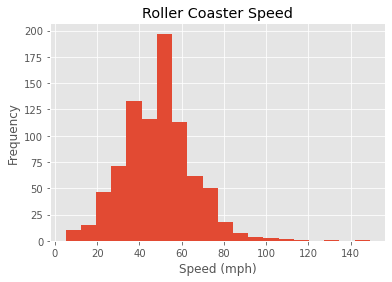

In [17]:
# create a histogram for roller coaster speed

ax = df['SpeedMPH'].plot(kind='hist',
                         bins=20,
                         title="Roller Coaster Speed")
ax.set_xlabel('Speed (mph)');

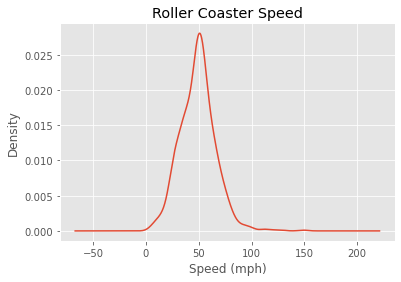

In [18]:
# create a density plot for roller coaster speed

ax = df['SpeedMPH'].plot(kind='kde',
                         title="Roller Coaster Speed")
ax.set_xlabel('Speed (mph)');

## Feature Relationships

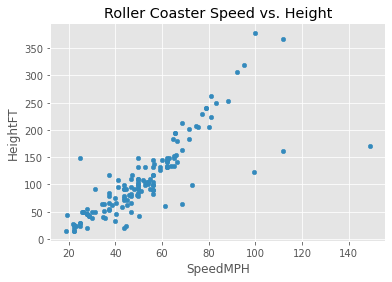

In [19]:
df.plot(kind='scatter',
       x='SpeedMPH',
       y='HeightFT',
       title='Roller Coaster Speed vs. Height');

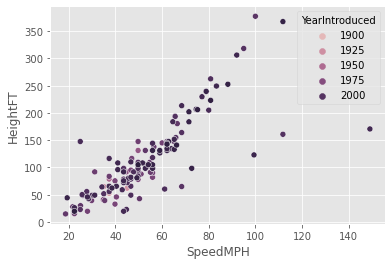

In [20]:
sns.scatterplot(x='SpeedMPH',
               y='HeightFT',
               hue='YearIntroduced',
               data=df);

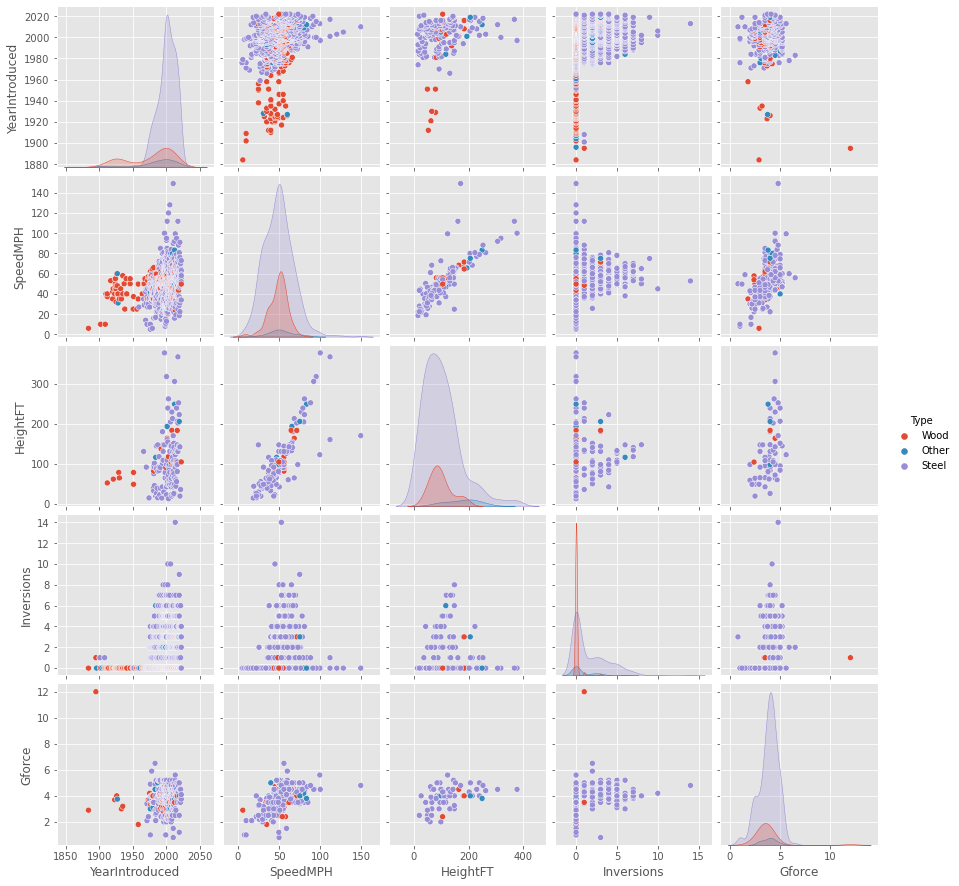

In [21]:
sns.pairplot(df, 
            vars=['YearIntroduced','SpeedMPH','HeightFT','Inversions','Gforce'],
            hue='Type');

In [22]:
df_corr = df[['YearIntroduced','SpeedMPH','HeightFT','Inversions','Gforce']].dropna().corr()
df_corr

,YearIntroduced,SpeedMPH,HeightFT,Inversions,Gforce
YearIntroduced,1.000000,0.171978,0.135413,-0.209887,0.160247
SpeedMPH,0.171978,1.000000,0.733999,-0.028705,0.607383
HeightFT,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


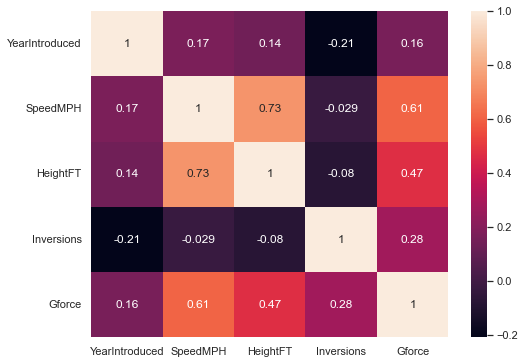

In [23]:
sns.set (rc = {'figure.figsize':(8, 6)})
sns.heatmap(df_corr,
           annot=True);

## Question About The Data

### What are the locations with the fastest roller coasters?

In [24]:
# Filter results to exclude any location with the name 'Other'

df.query('Location != "Other"')

,CoasterName,Location,Status,Manufacturer,YearIntroduced,Latitude,Longitude,Type,OpeningDate,SpeedMPH,HeightFT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [45]:
# Display the number of roller coasters by location, and the average speed (minimum roller coaster count of 10)

coasterquery = df.query('Location != "Other"') \
                .groupby('Location')['SpeedMPH'] \
                .agg(['mean','count']) \
                .query('count >= 10') \
                .sort_values('mean')['mean']
coasterquery

Location
Alton Towers                  42.791667
Carowinds                     43.571429
Kings Island                  49.273684
Hersheypark                   50.576923
Kings Dominion                52.083333
Six Flags Great Adventure     53.036364
Canada's Wonderland           53.533333
Six Flags Magic Mountain      57.241176
Cedar Point                   57.833333
Busch Gardens Williamsburg    58.318182
Name: mean, dtype: float64

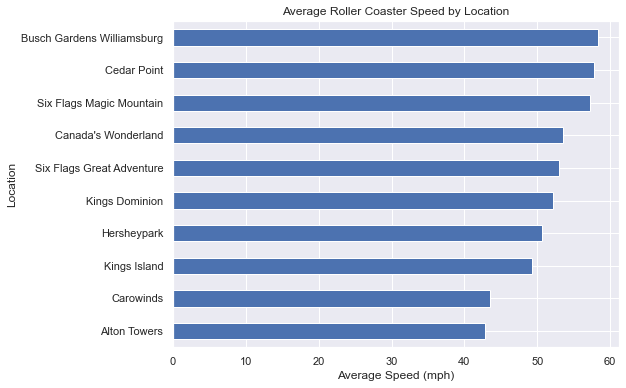

In [42]:
# Plot the results

ax = coasterquery.plot(kind='barh', title='Average Roller Coaster Speed by Location')
ax.set_xlabel('Average Speed (mph)');